In [2]:
# 生成随机的X
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
np.random.seed(20221223)
mu0=200
sigma0=np.sqrt(2)
X=stats.norm.rvs(mu0,sigma0,size=100)

In [98]:
def proposal_sampler(mu,phi):
    mu_update = np.random.uniform(-3*mu/2-1,3*mu/2+1)
    phi_update = np.random.uniform(phi/2,3*phi/2)
    return mu_update, phi_update

def probcompute(mu1,phi1,mu2,phi2, X):
    g_up = 1/(3*mu2+2)*1/(phi2)
    g_down = 1/(mu1+2)*1/(phi1)
    p_up = np.power(phi2,100/2-1)*np.exp(-(phi2/2)*sum([x*x for x in list(X-mu2)]))
    p_down = np.power(phi1,100/2-1)*np.exp(-(phi1/2)*sum([x*x for x in list(X-mu1)]))
    return g_up*p_up/(g_down*p_down)


def mcmc(mu, phi,X):
#    sampler
    mu_update, phi_update = proposal_sampler(mu,phi)
    alpha = np.random.random(1)
    if alpha < min(1,probcompute(mu,phi,mu_update,phi_update,X)):
        mu = mu_update
        phi = phi_update
        
    return mu, phi

C:\Users\sherly\AppData\Local\Temp\ipykernel_14052\3454053831.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return g_up*p_up/(g_down*p_down)
C:\Users\sherly\AppData\Local\Temp\ipykernel_14052\3454053831.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return g_up*p_up/(g_down*p_down)


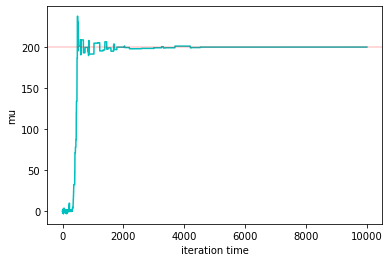

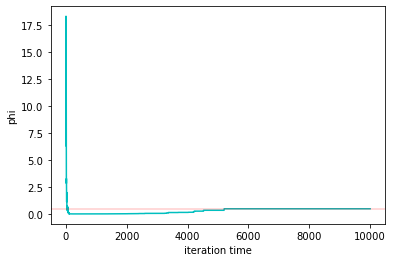

In [99]:
if __name__ == '__main__':
    # initialize
    mu = 0
    phi =5
    u_list = []
    phi_list = []
    for i in range(10000):
        mu,phi = mcmc(mu,phi,X)
        u_list.append(mu)
        phi_list.append(phi)
    plt.plot(u_list, c='c')
    plt.ylabel('mu')
    plt.xlabel('iteration time')
    plt.axhline(200,c='r',linewidth=0.3)
    plt.savefig('D:/lecture/final_for_prob/mu_trace.jpg')
    plt.show()
    plt.plot(phi_list, c='c')
    plt.ylabel('phi')
    plt.xlabel('iteration time')
    plt.axhline(0.5,c='r',linewidth=0.3)
    plt.savefig('D:/lecture/final_for_prob/phi_trace.jpg')
    plt.show()

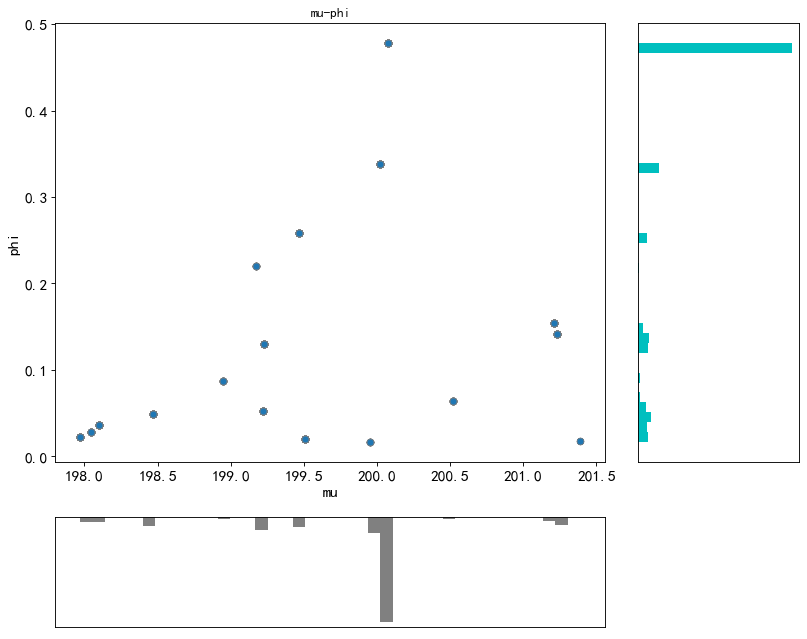

In [164]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# 获取数据
u_his = u_list[2000:]
phi_his = phi_list[2000:]
df = pd.DataFrame({'mu':u_his,'phi':phi_his},columns=['mu','phi'])
# df.count = 

# 创建画布并将画布分割成格子
fig = plt.figure(figsize=(12, 10), dpi=80, facecolor='white')
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 添加子图
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, :-1], xticklabels=[], yticklabels=[])

# 在中心绘制气泡图
ax_main.scatter('mu', 'phi'
#                 , s=df.count * 4 # 点的大小为数量的多少
                , data=df #数据集
                , cmap='tab10' # 调色板
                , edgecolors='gray' # 边缘颜色
                , linewidth=.5 # 线宽
                , alpha=.9) # 透明度
# 绘制底部直方图
ax_bottom.hist(df.mu, 40, histtype='stepfilled', orientation='vertical', color='grey')
ax_bottom.invert_yaxis()  # 让y轴反向

# 绘制右边直方图
ax_right.hist(df.phi, 40, histtype='stepfilled', orientation='horizontal', color='c')

# 装饰图像
plt.rcParams['font.sans-serif'] = ['Simhei']
ax_main.set(title='mu-phi'
            , xlabel='mu'
            , ylabel='phi')
ax_main.title.set_fontsize = (20)

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

for item in [ax_bottom, ax_right]:
    item.set_xticks([]) # 去掉直方图的标尺
    item.set_yticks([])

label_format = '{:,.1f}'  # 创建浮点数格式 .1f一位小数
xlabels = ax_main.get_xticks().tolist()
ax_main.xaxis.set_major_locator(mticker.FixedLocator(xlabels))  # 定位到散点图的x轴
ax_main.set_xticklabels([label_format.format(x) for x in xlabels])  # 使用列表推导式循环将刻度转换成浮点数
plt.savefig('D:/lecture/final_for_prob/marginal_hist.jpg')
plt.show()


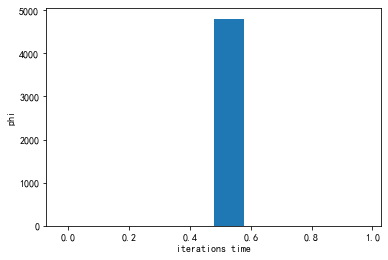

In [166]:
phi_his = phi_list[5200:]
plt.hist(phi_his)
plt.xlabel('iterations time')
plt.ylabel('phi')
plt.savefig('D:/lecture/final_for_prob/phi_hist.jpg')